This is the first of two examples illustrating the effects of diffusion.

In this example, we will illustrate the homogeneizing effect of intercellular diffusion on the concentrations of species dissolved in cells. We will show that, in the absence of synthesis or degradation, applying diffusion to a tissue with non-uniform initial concentrations results in the uniformization of concentrations throughout the tissue.

# Preparation

In [1]:
%matplotlib notebook

# Imports

In [2]:
import multicell
import numpy as np

Numpy arrays will be used to define cell-related properties for all cells.

# Problem definition

## Simulation and tissue structure

For these diffusion-related examples, we will use a tissue comprised of a single file of cells to emphasize how the concentration of a species evolves as you move away from its source, under various sets of assumptions.

In [3]:
sim = multicell.simulation_builder.generate_cell_grid_sim(20, 1, 1, 1e-3)

## Biological species

As we only need to study the concentrations of one species, we register a single species `a`.

In [4]:
sim.register_cell_variable("a")

By default, multicell will consider this variable *a* as an extensive variable (e.g. a quantity of matter). It will also create an associated intensive variable `c_a`. For each cell $c_a = \dfrac{a}{V}$, where `V` is the volume of the cell. Therefore, as `a` is a quantity of matter, `c_a` is a concentration. The names `a` and `c_a` can be used in equations, as we will see later.

In our example, `V` is always 1 (arb. unit), so $c_a = a$.

## Constants

We also define a single constant `D_a` to represent the rate of diffusion of `a`.

In [5]:
sim.set_constants({"D_a": 100.})

## Differential equations

In Multicell, the differential equations governing cell variables are defined using Python functions following certain conventions.

First, the names of input parameters matter, as they will be used by multicell to map cell properties, constants and computed variables defined in the simulation to the input parameters of differential equations. However, the order of parameters does not matter.

Second, they must return an array (representing a mathematical vector) of values corresponding to the values of each cell, or something that can be broadcast into an array (e.g. a scalar). 

We define the differential equation of `a` as the following function.

In [6]:
def da_dt(simulation, c_a, D_a, adjacency_matrix):
    return simulation.diffusion(D_a, c_a, adjacency_matrix)

sim.set_ODE("a", da_dt)

`da_dt` takes four arguments. `D_a` is a constant we defined earlier, however the others are automatically managed variables. `c_a` is the automatically defined concentration mentioned previously. `simulation` is a special name enabling equations to access the Simulation object. `adjacency_matrix` is another special name for an automatically generated matrix describing exchange surfaces between cells.

As we only want diffusion, without synthesis or degradation, `da_dt` simply returns the effect of diffusion computed by function `simulation.diffusion`. In multicell, the effects of transport phenomena (passive or active) should be computed by built-in methods of the Simulation object. This is because these functions do not simply compute the effects of transport, but also expose necessary information to the Simulation object to determine the structure of the Jacobian matrix, which is crucial to the fast integration of the system of differential equations.

## Initial conditions

Before setting the initial concentrations, we must first signal Multicell that we have finished registering variables, so that the array that will hold the concentrations is created.

In [7]:
sim.initialize_cell_variables()

We then set the initial concentrations to 20 for half of the cells, and 0 for the others, which will have a concentration of 20 (arb. units).

In [8]:
a0 = np.array([20] * 10 + [0] * 10)

sim.set_cell_variable("a", a0)

## Duration

We know empirically that the system will be close to its steady state after 4 time units. We therefore set the simulation duration to 4.

In [9]:
sim.set_duration(4)

By default, Multicell would only show the final state of the simulation. We would however also like to see some intermediate states, so we set up the simulation to plot results at 10 time points. As diffusive system evolve faster at the beginning of a reaction, we use a `log2` spacing of the time points.

In [10]:
sim.set_time_steps(10, "log2")

## Rendering

We finally register a renderer for the simulation, whose task will be to plot the values of `c_a`. In the arguments supplied to the renderer, we added `max_cmap`, which is the maximum value of the color map. This will ensure that all figures are plotted using the same color scale.

In [11]:
sim.register_renderer(multicell.rendering.MatplotlibRenderer, "c_a", {"max_cmap": 20, "view": (90, -90), "axes":False})


# Visualization of the initial state

We can display the concentrations of a using the following command.

<IPython.core.display.Javascript object>


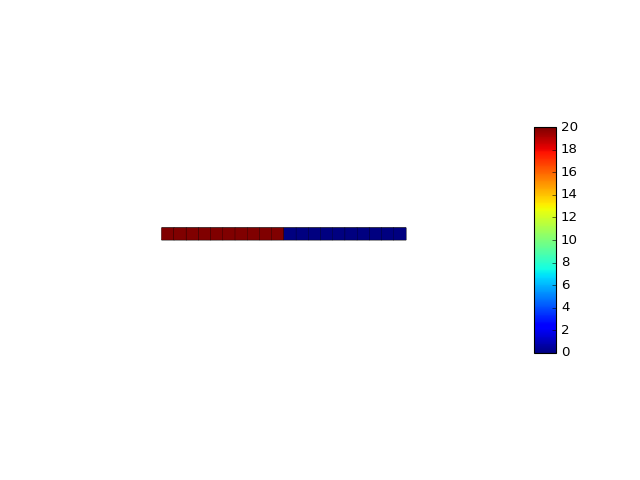

Time point: 0.0
c_a: from 0.0 to 20.0116836006


In [12]:
sim.renderer.display("c_a")

Cells with a concentration of 0 are dark blue. Cells with a concentration of 20 are dark red.

# Simulation

In order to see how concentrations evolve over time, we run the simulation. The tissue will automatically be rendered for the time steps we defined.

<IPython.core.display.Javascript object>


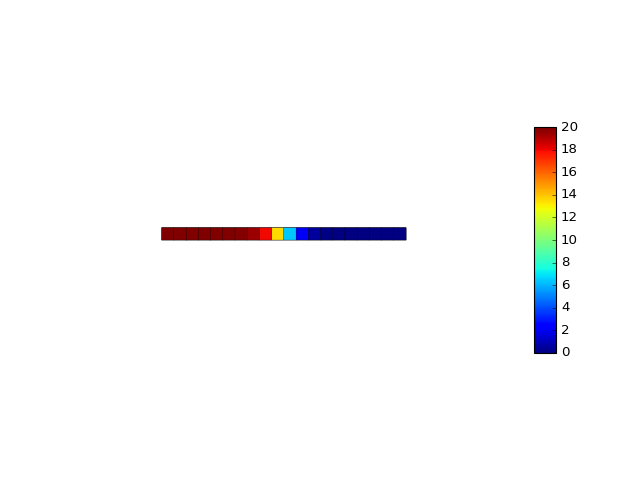

Time point: 0.0078125
c_a: from 1.19081286899e-07 to 20.004545006


<IPython.core.display.Javascript object>


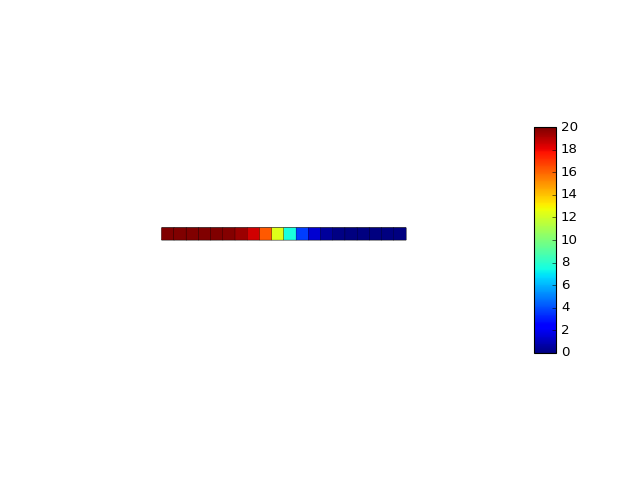

Time point: 0.015625
c_a: from 3.45384113696e-05 to 19.9978955361


<IPython.core.display.Javascript object>


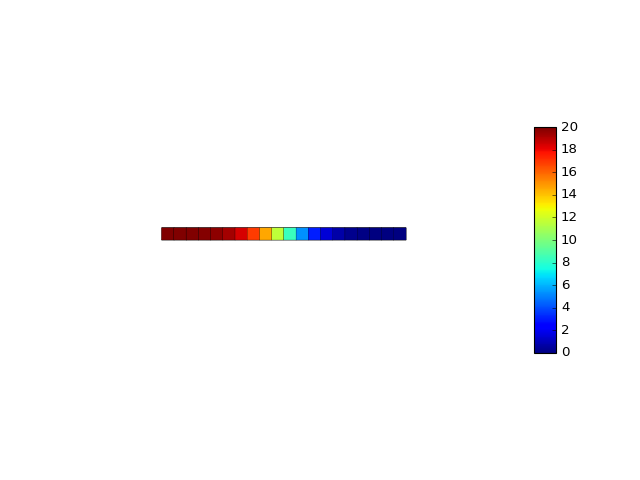

Time point: 0.03125
c_a: from 0.00378647853988 to 19.993214101


<IPython.core.display.Javascript object>


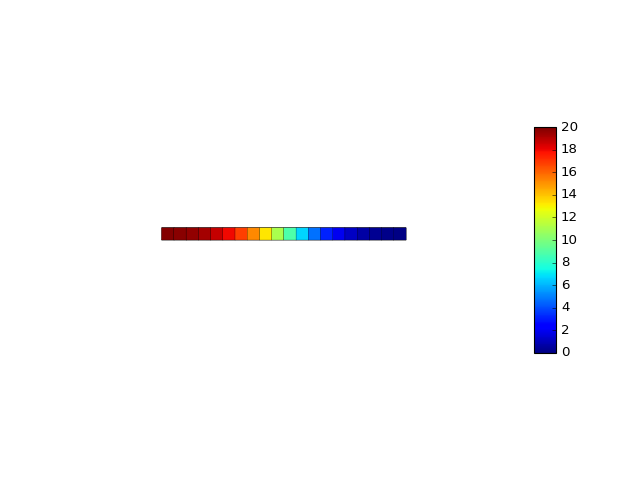

Time point: 0.0625
c_a: from 0.112375964811 to 19.8867913147


<IPython.core.display.Javascript object>


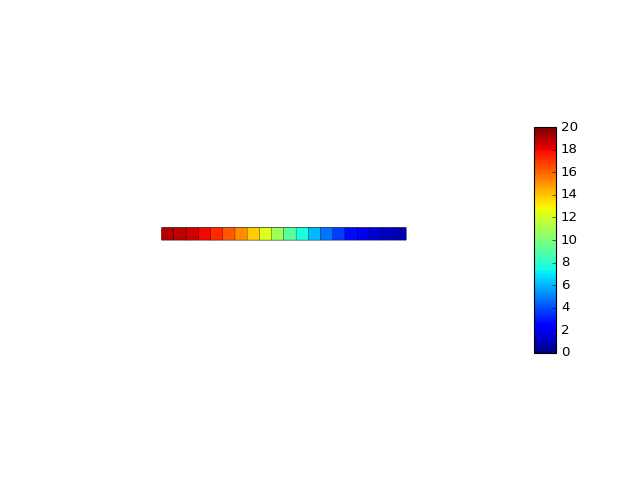

Time point: 0.125
c_a: from 0.931593451138 to 19.0693977199


<IPython.core.display.Javascript object>


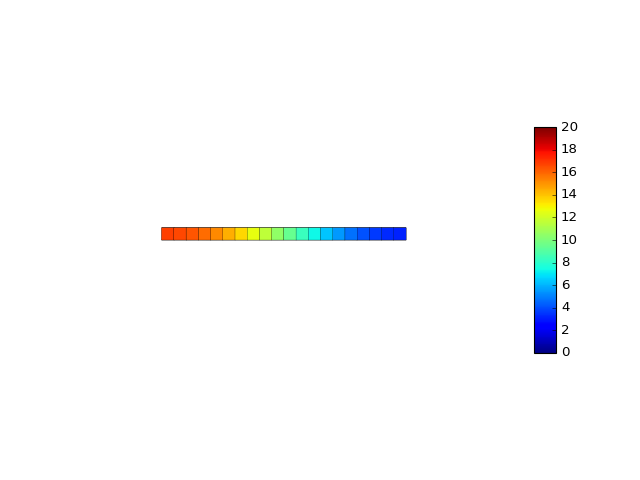

Time point: 0.25
c_a: from 3.1525357959 to 16.8495823511


<IPython.core.display.Javascript object>


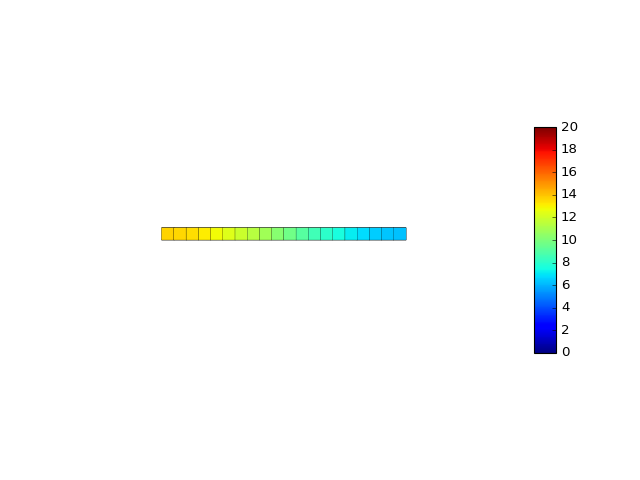

Time point: 0.5
c_a: from 6.29058093992 to 13.7116632077


<IPython.core.display.Javascript object>


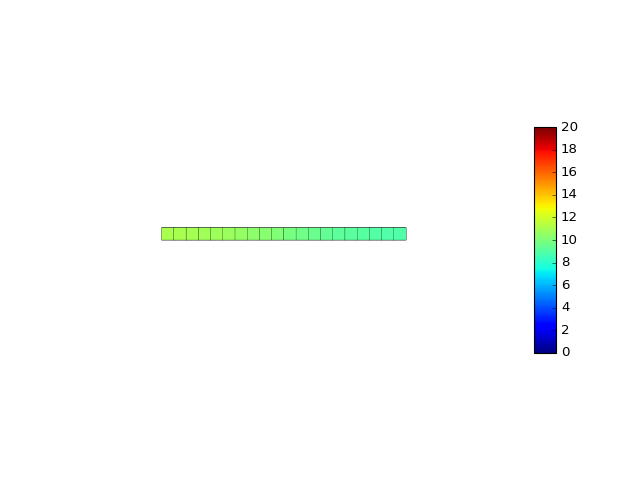

Time point: 1.0
c_a: from 8.91735394678 to 11.0845879073


<IPython.core.display.Javascript object>


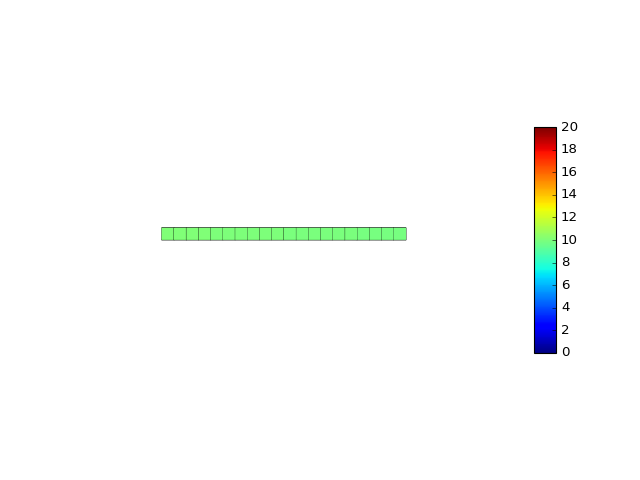

Time point: 2.0
c_a: from 9.90849047428 to 10.0933180757


<IPython.core.display.Javascript object>


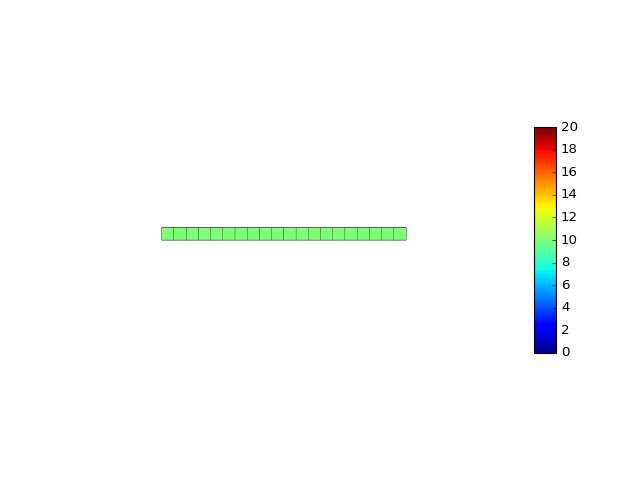

Time point: 4.0
c_a: from 10.0002257035 to 10.0015704721


In [13]:
sim.simulate()

All cells now have a concentration close to 10, as shown by the line `c_a: from 10.00... to 10.00...` under the plot. This shows that diffusion uniformizes concentrations.